In [1]:
import os
import sys
import time
import warnings
import platform
from datetime import datetime,timedelta

# Basic Data Analysis Tools
import numpy as np
import pandas as pd

# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# import FinanceDataReader as fdr

# Exploratory Data Analysis (EDA)
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.offline as offline
import plotly.graph_objs as go
import scipy as sp

# Data Preprocessing and Cleansing
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

# Train / Test Dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Machine Learning Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# from vecstack import stacking

# Hyper Param Optimization
from sklearn.model_selection import GridSearchCV

# testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# from sklearn.externals import joblib 

In [2]:
from dateutil.relativedelta import *

In [3]:
import datetime, time

In [4]:
# pd.options.display.max_rows = 999
# pd.options.display.max_columns = 100

In [5]:
# ['이지바이오.xlsx', '한일사료.xlsx', '케이씨피드.xlsx', '대주산업.xlsx']
company = '대주산업'

In [6]:
easybio=['change%_leanhog_f',
 'kospi_vol_merge',
 'adx',
 'volume_livecattle_f',
 'change%_kospi_volatility',
 'rate_rolling_30',
 'stoch_slowd',
 'leanhog_std5',
 'cci',
 'ema20',
 'rate_rolling_3',
 'change%_livecattle_f',
 'Change %_South Korea 5-Year Bond Yield',
 'ko_bond_std5',
 'volumne(mean_5d)(week)',
 'volume_leanhog_f',
 'kospivol_std5',
 'livecattle_std5',
 'stoch_slowk',
 'usd_krw_std5',
 'change%_USD_KRW',
 'adjusted_price',
 'volumne(week)',
'target',
       'profit_rate',
       'event1', 'event2', 'event3', 'event4', 'event5',
                    'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
                    'event13', 'event14', 'event15', 'event16'
]

In [7]:
daeju= ['ko_bond_std5',
 'change%_USD_KRW',
 'rate_rolling_120',
 'rate_rolling_3',
 'volumne(week)',
 'Change %_South Korea 5-Year Bond Yield',
 'change%_livecattle_f',
 'change%_kospi_volatility',
 'kospivol_std5',
 'stoch_slowk',
 'adosc',
 'willr',
 'rate_rolling_5',
 'usd_krw_std5',
 'change%_leanhog_f',
 'volume_livecattle_f',
 'cci',
 'rate_rolling_150',
 'rate_rolling_30',
 'livecattle_std5',
 'volume_leanhog_f',
 'leanhog_std5',
 'adx',
 'stoch_slowd',
       'target',
       'profit_rate',
       'adjusted_price']
      #  'event1', 'event2', 'event3', 'event4', 'event5',
      #               'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
      #               'event13', 'event14', 'event15', 'event16']

In [8]:
kspd = ['stoch_slowk',
 'rate_rolling_5',
 'volumne(week)',
 'leanhog_std5',
 'volume_livecattle_f',
 'cci',
 'livecattle_std5',
 'rate_rolling_30',
 'change%_kospi_volatility',
 'volumne(mean_5d)(week)',
 'ko_bond_std5',
 'rate_rolling_3',
 'change%_leanhog_f',
 'rate_rolling_150',
 'volume_leanhog_f',
 'kospi_vol_merge',
 'adosc',
 'stoch_slowd',
 'willr',
 'change%_USD_KRW',
 'usd_krw_std5',
 'kospivol_std5',
 'kospivol_mean3',
 'Change %_South Korea 5-Year Bond Yield',
 'change%_livecattle_f',
        'target',
       'profit_rate',
       'adjusted_price',
              'event1', 'event2', 'event3', 'event4', 'event5',
                    'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
                    'event13', 'event14', 'event15', 'event16']

In [9]:
hanil = ['stoch_slowd',
 'adx',
 'cci',
 'volumne(mean_5d)(week)',
 'rate_rolling_5',
 'volumne(week)',
 'rate_rolling_3',
 'ko_bond_std5',
 'rate_rolling_30',
 'volume_leanhog_f',
 'change%_USD_KRW',
 'rate_rolling_150',
 'change%_leanhog_f',
 'stoch_slowk',
 'volume_livecattle_f',
 'rate_rolling_10',
 'change%_livecattle_f',
 'Change %_South Korea 5-Year Bond Yield',
 'kospivol_std5',
 'livecattle_std5',
 'leanhog_std5',
 'usd_krw_std5',
 'change%_kospi_volatility',
        'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [10]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\축산업')
data = pd.read_csv('data_{}.csv'.format(company),thousands=',',index_col=0)
# rl_data = pd.read_csv('rl_data.csv',thousands=',',index_col=0)
data.head()

,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit_merge,profit_mean3,profit_std5,adjusted_BPS,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-06,87143282.0,42747329.0,23192879.0,615.0,133017.0,169021.0,951222.63,NaN,NaN,1253.89,...,-0.174922,0.372242,-0.154076,0.041031,-0.295172,0.075329,-0.378216,0.400959,-0.065426,0.009876
2013-08-07,87143282.0,42747329.0,23192879.0,609.0,122216.0,94354.0,951222.63,NaN,NaN,1253.89,...,-0.211991,0.229430,-0.154531,-0.066048,-0.314020,-0.091246,-0.399295,0.243291,-0.125135,-0.047453
2013-08-08,87143282.0,42747329.0,23192879.0,603.0,129125.0,173350.0,951222.63,951222.63,NaN,1253.89,...,-0.219789,0.208893,-0.256044,-0.125333,-0.401188,-0.132657,-0.421372,0.279978,-0.124931,-0.079418
2013-08-09,87143282.0,42747329.0,23192879.0,598.0,143341.0,164927.0,951222.63,951222.63,NaN,1253.89,...,-0.193945,0.118752,-0.141465,-0.042301,-0.326500,-0.144574,-0.381598,0.312425,-0.132161,-0.036942
2013-08-12,87143282.0,42747329.0,23192879.0,595.0,140110.0,98897.0,951222.63,951222.63,0.0,1253.89,...,-0.178057,0.262238,-0.204710,-0.065658,-0.383006,-0.074472,-0.415591,0.249325,-0.083220,-0.102659


In [11]:
data= data[daeju]

In [12]:
# zero_one = {-2 : 0, -1 : 0, 0 : 0, 1 : 1, 2 : 1}
# data.target = data.target.apply(lambda x : zero_one[x])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1570 entries, 2013-08-06 to 2019-12-30
Data columns (total 27 columns):
ko_bond_std5                              1566 non-null float64
change%_USD_KRW                           1570 non-null float64
rate_rolling_120                          1570 non-null float64
rate_rolling_3                            1570 non-null float64
volumne(week)                             1570 non-null float64
Change %_South Korea 5-Year Bond Yield    1570 non-null float64
change%_livecattle_f                      1570 non-null float64
change%_kospi_volatility                  1570 non-null float64
kospivol_std5                             1566 non-null float64
stoch_slowk                               1570 non-null float64
adosc                                     1570 non-null float64
willr                                     1570 non-null float64
rate_rolling_5                            1570 non-null float64
usd_krw_std5                              1566 non-

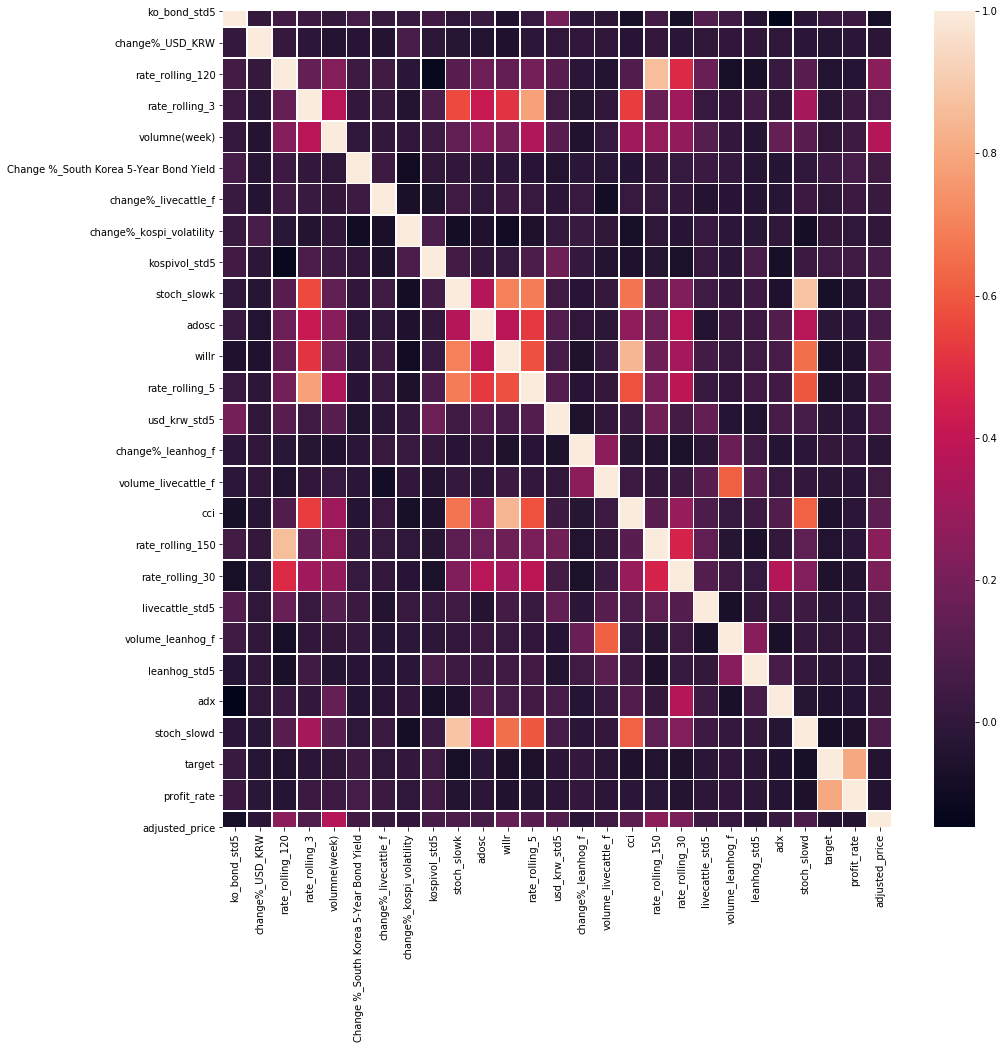

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), linewidths=.5)
plt.show()

In [15]:
data.head()

,ko_bond_std5,change%_USD_KRW,rate_rolling_120,rate_rolling_3,volumne(week),Change %_South Korea 5-Year Bond Yield,change%_livecattle_f,change%_kospi_volatility,kospivol_std5,stoch_slowk,...,rate_rolling_150,rate_rolling_30,livecattle_std5,volume_leanhog_f,leanhog_std5,adx,stoch_slowd,target,profit_rate,adjusted_price
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-06,NaN,0.00,-0.137869,-0.535738,169021.0,0.16,0.31,0.40,NaN,57.142857,...,-0.152548,-0.130766,NaN,9.55,NaN,22.804930,50.955988,-1,-0.975610,615.0
2013-08-07,NaN,0.11,-0.150754,-0.806917,94354.0,1.41,0.25,2.47,NaN,48.378192,...,-0.172184,-0.268734,NaN,10.04,NaN,22.737153,53.475751,-1,-1.470588,609.0
2013-08-08,NaN,-0.24,-0.164188,-1.243436,173350.0,-0.46,1.20,-2.54,NaN,25.957557,...,-0.177042,-0.412041,NaN,4.42,NaN,22.759555,43.826202,-2,-1.967213,603.0
2013-08-09,NaN,-0.11,-0.212182,-1.471137,164927.0,0.31,-0.14,-3.88,NaN,14.251208,...,-0.214217,-0.520975,NaN,3.34,NaN,23.420063,29.528986,-1,-0.833333,598.0
2013-08-12,0.021114,0.24,-0.213481,-1.423712,98897.0,-0.62,0.90,2.36,0.173427,6.704981,...,-0.203697,-0.490736,1.013584,3.30,0.287355,24.033392,15.637915,-1,-0.497512,595.0


In [16]:
# data = data.set_index('Date')
# data.head()

좀 줄이기

In [17]:
test_data = data['2019':]
# test_data.to_csv('test.csv')

In [18]:
train_data = data['2015':'2018']
# train_data.to_csv('train.csv') 

In [19]:
train_data = train_data.reset_index()
test_data = test_data.reset_index()

In [20]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

In [21]:
col = train_data.columns.to_list()

In [22]:
del col[col.index('target')]
del col[col.index('profit_rate')]
# del col[col.index('Date')]

In [23]:
X = train_data[col]
y = train_data['target']

In [24]:
test_X = test_data[col]
test_y = test_data['target']

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=2019)

In [26]:
date_columns = 'Date'
# train_data[date_columns]

In [27]:
def cross_validate_with_model(model):

    model_name = type(model).__name__

    print('현재 교차검증 중인 모델 : {}'.format(model_name))

    score = cross_validate(model,
                           X_train.drop('Date', axis=1),
                           y_train,
                           cv=k_fold,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

    mean_score = np.round(np.mean(score['test_score'])*100, 2)
    fit_time_per_cv = np.round(np.mean(score['fit_time']), 2)
    print('Test Mean Score : {}'.format(mean_score))
    print('Fit Time / Each CV : {}s'.format(fit_time_per_cv))
    return model_name, score, mean_score, fit_time_per_cv

In [28]:
k_fold = KFold(n_splits=5,
               shuffle=True,
               random_state=0)

In [29]:
def compare_model_score(model):
    print('학습용 / 검증요 데이터 비교...')
    model.fit(X_train.drop('Date', axis=1), y_train)
    print('학습용 데이터 평가 중...')
    model.score(X_train.drop('Date', axis=1),y_train)
    print('검증용 데이터 평가 중...')
    model.score(X_val.drop('Date', axis=1),y_val)

In [30]:
def show_test_result(y_test, y_pred):
    LINE_LENGHT = 60
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('total result'.upper()))
    print('='*LINE_LENGHT)
    print('{:<10} : {}'.format('RECALL', recall_score(y_test, y_pred)))
    print('{:<10} : {}'.format('PRECISION', precision_score(y_test, y_pred)))
    print('{:<10} : {}'.format('F1 SCORE', f1_score(y_test, y_pred)))
    print('{:<10} : {}'.format('ROC SCORE', roc_auc_score(y_test, y_pred)))
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('classification report'.upper()))
    print('='*LINE_LENGHT)
    print(classification_report(y_test, y_pred))# Decision Tree

In [31]:
model_score = dict()

In [32]:
# X_train.drop('Date', axis=1)

In [33]:
# LightGBM
model_lgbm = LGBMClassifier(boosting_type='gbdt', class_weight='balanced', colsample_bytree=1.0,
                            importance_type='split', lambda_l1=0, lambda_l2=1,
                            learning_rate=1, max_depth=-1 , min_child_samples=20,
                            min_child_weight=0.001, min_data_in_leaf=30, min_split_gain=0.0,
                            n_estimators=200, n_jobs=-1, num_leaves=31,
                            objective=None, random_state=42, reg_alpha=0.1, reg_lambda=0.0,
                            silent=True, subsample=1.0, subsample_for_bin=200000,
                            subsample_freq=0)

# cross_valid
model_name, _, mean_score,_ = cross_validate_with_model(model_lgbm)
model_score[model_name] = mean_score
model_lgbm.fit(X_train.drop('Date', axis=1),y_train, eval_set = (X_val.drop(['Date'], axis=1), y_val))

현재 교차검증 중인 모델 : LGBMClassifier
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
Test Mean Score : 27.16
Fit Time / Each CV : 0.76s
[1]	valid_0's multi_logloss: 1.65327
[2]	valid_0's multi_logloss: 1.76794
[3]	valid_0's multi_logloss: 1.7952
[4]	valid_0's multi_logloss: 1.82505
[5]	valid_0's multi_logloss: 1.9368
[6]	valid_0's multi_logloss: 1.96983
[7]	valid_0's multi_logloss: 2.03675
[8]	valid_0's multi_logloss: 2.05901
[9]	valid_0's multi_logloss: 2.09371
[10]	valid_0's multi_logloss: 2.17038
[11]	valid_0's multi_logloss: 2.20075
[12]	valid_0's multi_logloss: 2.20919
[13]	valid_0's multi_logloss: 2.28399
[14]	valid_0's multi_logloss: 2.30513
[15]	valid_0's multi_logloss: 2.34467
[16]	valid_0's multi_logloss: 2.38162
[17]	valid_0's multi_logloss: 2.42968
[18]	valid_0's multi_logloss: 2.45624
[19]	valid_0's multi_logloss: 2.46609
[20]	valid_0's multi_logloss: 2.51985
[21]	valid_0's multi_

LGBMClassifier(class_weight='balanced', lambda_l1=0, lambda_l2=1,
               learning_rate=1, min_data_in_leaf=30, n_estimators=200,
               random_state=42, reg_alpha=0.1)

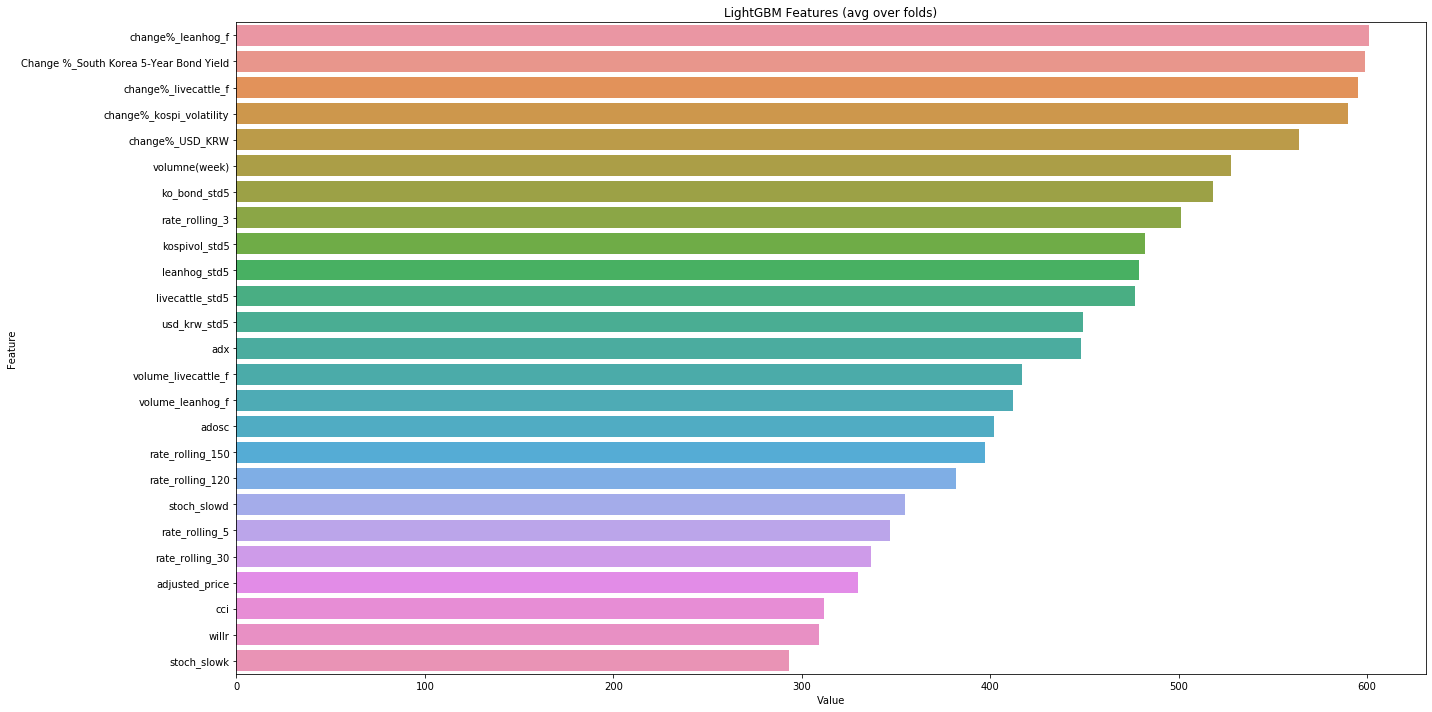

In [34]:
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.feature_importances_,X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances-01.png')

In [35]:
model = model_lgbm
#cross
# result = pd.DataFrame(model.predict_proba(test_X.values),columns=['d2','d1','hold','u1','u2'])
# profit = pd.DataFrame(test_data.profit_rate.values,columns=['profitrate'])
# _pred = pd.DataFrame(model.predict(test_X.values),columns=['pred'])
# _true = pd.DataFrame(test_data.target.values,columns=['true'])
# test = pd.concat([result,profit,_pred,_true],axis=1)
# test.describe()

#sliding
result = pd.DataFrame(model.predict_proba(test_X.drop('Date', axis=1).values),columns=['d2','d1','hold','u1','u2'])
# result = pd.DataFrame(model.predict_proba(test_X.drop('Date', axis=1).values),columns=['d2', 'u2'])
profit = pd.DataFrame(test_data.profit_rate.values,columns=['profitrate'])
_pred = pd.DataFrame(model.predict(test_X.drop('Date', axis=1).values),columns=['pred'])
_true = pd.DataFrame(test_data.target.values,columns=['true'])
test = pd.concat([result,profit,_pred,_true],axis=1)
test.describe()

,d2,d1,hold,u1,u2,profitrate,pred,true
count,246.000000,246.000000,2.460000e+02,246.000000,246.000000,245.000000,246.000000,246.000000
mean,0.106992,0.139403,2.659674e-02,0.436487,0.290521,-0.251312,0.752033,-0.195122
std,0.219355,0.232188,9.120599e-02,0.343552,0.324466,2.522469,1.267931,1.482736
min,0.000004,0.000011,9.181901e-07,0.000250,0.000196,-8.902077,-2.000000,-2.000000
25%,0.001363,0.005999,1.825208e-04,0.110605,0.016541,-1.672241,1.000000,-2.000000
50%,0.010100,0.025234,1.129277e-03,0.337077,0.135095,-0.305810,1.000000,-1.000000
75%,0.083727,0.156795,8.307456e-03,0.780340,0.507439,1.111111,2.000000,1.000000
max,0.991024,0.982534,7.756161e-01,0.999672,0.995108,10.283688,2.000000,2.000000


Index(['index', 'ko_bond_std5', 'change%_USD_KRW', 'rate_rolling_120',
       'rate_rolling_3', 'volumne(week)',
       'Change %_South Korea 5-Year Bond Yield', 'change%_livecattle_f',
       'change%_kospi_volatility', 'kospivol_std5', 'stoch_slowk', 'adosc',
       'willr', 'rate_rolling_5', 'usd_krw_std5', 'change%_leanhog_f',
       'volume_livecattle_f', 'cci', 'rate_rolling_150', 'rate_rolling_30',
       'livecattle_std5', 'volume_leanhog_f', 'leanhog_std5', 'adx',
       'stoch_slowd', 'adjusted_price', 'event1', 'event2', 'event3', 'event4',
       'event5', 'event6', 'event7', 'event8', 'event9', 'event10', 'event11',
       'event12', 'event13', 'event14', 'event15', 'event16'],
      dtype='object')

In [36]:
data = data.reset_index()
profit_rate = data.profit_rate
target= data.target
Date = data.Date
data = data.drop(columns=['Date','profit_rate','target'])

In [37]:
result = pd.DataFrame(model.predict_proba(data.values),columns=['d2', 'd1', 'hold', 'u1', 'u2'])
# result = pd.DataFrame(model.predict_proba(data.values),columns=['d2','u2'])
profit = pd.DataFrame(profit_rate.values,columns=['profitrate'])
_pred = pd.DataFrame(model.predict(data.values),columns=['pred'])
_true = pd.DataFrame(target.values,columns=['true'])
# rl_data = pd.concat([result,profit,_pred,_true],axis=1)
# rl_data.index = Date
# rl_data.to_csv('rl_data.csv')
# data.head(10)

In [38]:
# test_X

In [39]:
# rl_data'd2', 'd1', 'hold', 'u1', 'u2'

In [40]:
# test.head(30)

In [41]:
true_false = pd.concat([_pred,_true],axis=1)
# true_false.head()

In [42]:
true_false['ox'] = (true_false.pred==true_false.true)
# true_false.head()

In [43]:
for i in [-2,-1,0,1,2]:
    print('label : ',i)
    print("   true  : ",true_false[(true_false.pred==i)&(true_false.ox==True)].shape[0])
    print("   false : ",true_false[(true_false.pred==i)&(true_false.ox==False)].shape[0])

label :  -2
   true  :  238
   false :  148
label :  -1
   true  :  131
   false :  96
label :  0
   true  :  42
   false :  25
label :  1
   true  :  201
   false :  285
label :  2
   true  :  204
   false :  200


In [44]:
for i in [-2,-1,0,1,2]:
    print('label : ',i)
    print("   true : ",true_false[(true_false.true==i)&(true_false.ox==True)].shape[0])
    print("   false : ",true_false[(true_false.true==i)&(true_false.ox==False)].shape[0])

label :  -2
   true :  238
   false :  195
label :  -1
   true :  131
   false :  219
label :  0
   true :  42
   false :  86
label :  1
   true :  201
   false :  126
label :  2
   true :  204
   false :  128


In [45]:
result_1 = pd.DataFrame()
result_2 = pd.DataFrame()
result_3 = pd.DataFrame()

In [46]:
def get_pred_from_model(model):
#     result = pd.DataFrame(model.predict_proba(test_X.values), columns=[
#                           'd2', 'd1', 'hold', 'u1', 'u2'])
#     normal_result = pd.DataFrame(columns=['d2', 'd1', 'hold', 'u1', 'u2'])
#     normal_result.d2 = result.d2/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.d1 = result.d1/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.hold = result.hold
#     normal_result.u1 = result.u1/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.u2 = result.u2/(result.d2+result.d1+result.u1+result.u2)

#     profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
#     _pred = pd.DataFrame(model.predict(test_X.values), columns=['pred'])
#     _true = pd.DataFrame(test_data.target.values, columns=['true'])
#     test = pd.concat([normal_result, profit, _pred, _true], axis=1)
    
#     model.score(test_X.values, test_y)

#     pred = pd.DataFrame(normal_result,
#                         columns=['d2', 'd1', 'hold', 'u1', 'u2'])
#     pred['cash'] = 0
#     pred['stock'] = 0
#     pred['adjusted_price'] = test_X['adjusted_price'].values
#     pred['buy_sell']=''

#     if pred.iloc[0, 3]+pred.iloc[0, 4] >= 0.6:
#         pred.iloc[0, 6] = 100000/pred.iloc[0, 7]
#         pred.iloc[0, 5] = 0
#     else:
#         pred.iloc[0, 5] = 100000
#         pred.iloc[0, 6] = 0

#     return pred

    result = pd.DataFrame(model.predict_proba(test_X.drop('Date', axis=1).values), columns=[
                          'd2', 'd1', 'hold', 'u1', 'u2'])
    normal_result = pd.DataFrame(columns=['d2', 'd1', 'hold', 'u1', 'u2'])
    normal_result.d2 = result.d2/(result.d2+result.d1+result.u1+result.u2)
    normal_result.d1 = result.d1/(result.d2+result.d1+result.u1+result.u2)
    normal_result.hold = result.hold
    normal_result.u1 = result.u1/(result.d2+result.d1+result.u1+result.u2)
    normal_result.u2 = result.u2/(result.d2+result.d1+result.u1+result.u2)

    profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
    _pred = pd.DataFrame(model.predict(test_X.drop('Date', axis=1).values), columns=['pred'])
    _true = pd.DataFrame(test_data.target.values, columns=['true'])
    test = pd.concat([normal_result, profit, _pred, _true], axis=1)
    
    model.score(test_X.drop('Date', axis=1).values, test_y)

    pred = pd.DataFrame(normal_result,
                        columns=['d2', 'd1', 'hold', 'u1', 'u2'])
    pred['cash'] = 0
    pred['stock'] = 0
    pred['adjusted_price'] = test_X['adjusted_price'].values
    pred['buy_sell']=''

    if pred.iloc[0, 3]+pred.iloc[0, 4] >= 0.6:
        pred.iloc[0, 6] = 100000/pred.iloc[0, 7]
        pred.iloc[0, 5] = 0
    else:
        pred.iloc[0, 5] = 100000
        pred.iloc[0, 6] = 0

    return pred

In [47]:
# def get_pred_from_model(model):
# #     result = pd.DataFrame(model.predict_proba(test_X.values), columns=[
# #                           'd2', 'd1', 'hold', 'u1', 'u2'])
# #     normal_result = pd.DataFrame(columns=['d2', 'd1', 'hold', 'u1', 'u2'])
# #     normal_result.d2 = result.d2/(result.d2+result.d1+result.u1+result.u2)
# #     normal_result.d1 = result.d1/(result.d2+result.d1+result.u1+result.u2)
# #     normal_result.hold = result.hold
# #     normal_result.u1 = result.u1/(result.d2+result.d1+result.u1+result.u2)
# #     normal_result.u2 = result.u2/(result.d2+result.d1+result.u1+result.u2)

# #     profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
# #     _pred = pd.DataFrame(model.predict(test_X.values), columns=['pred'])
# #     _true = pd.DataFrame(test_data.target.values, columns=['true'])
# #     test = pd.concat([normal_result, profit, _pred, _true], axis=1)
    
# #     model.score(test_X.values, test_y)

# #     pred = pd.DataFrame(normal_result,
# #                         columns=['d2', 'd1', 'hold', 'u1', 'u2'])
# #     pred['cash'] = 0
# #     pred['stock'] = 0
# #     pred['adjusted_price'] = test_X['adjusted_price'].values
# #     pred['buy_sell']=''

# #     if pred.iloc[0, 3]+pred.iloc[0, 4] >= 0.6:
# #         pred.iloc[0, 6] = 100000/pred.iloc[0, 7]
# #         pred.iloc[0, 5] = 0
# #     else:
# #         pred.iloc[0, 5] = 100000
# #         pred.iloc[0, 6] = 0

# #     return pred

#     result = pd.DataFrame(model.predict_proba(test_X.drop('Date', axis=1).values), columns=[
#                           'd2', 'd1', 'hold', 'u1', 'u2'])
    
#     # result = pd.DataFrame(model.predict_proba(test_X.drop('Date', axis=1).values), columns=[
#     #                       'd2', 'u2'])
#     normal_result = pd.DataFrame(columns=['d2', 'd1', 'hold', 'u1', 'u2'])
#     # normal_result = pd.DataFrame(columns=['d2','u2'])
#     normal_result.d2 = result.d2/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.d1 = result.d1/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.hold = result.hold
#     normal_result.u1 = result.u1/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.u2 = result.u2/(result.d2+result.d1+result.u1+result.u2)
#     # normal_result.d2 = result.d2/(result.d2+result.u2)
#     # normal_result.u2 = result.u2/(result.d2+result.u2)


#     profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
#     _pred = pd.DataFrame(model.predict(test_X.drop('Date', axis=1).values), columns=['pred'])
#     _true = pd.DataFrame(test_data.target.values, columns=['true'])
#     test = pd.concat([normal_result, profit, _pred, _true], axis=1)
    
#     model.score(test_X.drop('Date', axis=1).values, test_y)

#     # pred = pd.DataFrame(normal_result,
#     #                     columns=['d2', 'd1', 'hold', 'u1', 'u2'])
#     pred = pd.DataFrame(normal_result,
#                         columns=['d2', 'u2'])

#     pred['cash'] = 0
#     pred['stock'] = 0
#     pred['adjusted_price'] = test_X['adjusted_price'].values
#     pred['buy_sell']= ''

#     if pred.iloc[0, 1]+pred.iloc[0, 4] >= 0.6:
#         pred.iloc[0, 6] = 100000/pred.iloc[0, 7]
#         pred.iloc[0, 5] = 0
#     else:
#         pred.iloc[0, 5] = 100000
#         pred.iloc[0, 6] = 0

#     # if pred.iloc[0, 1] >= 0.6:
#     #     pred.iloc[0, 3] = 100000/pred.iloc[0, 4]
#     #     pred.iloc[0, 2] = 0
#     # else:
#     #     pred.iloc[0, 2] = 100000
#     #     pred.iloc[0, 3] = 0

#     return pred

In [48]:
# def backtest1(model,pred,weight,alone=True):
#     df = pred.values

#     # 5:cash
#     # 6:stock
#     # 7:price
    
    
#     s = 1
#     while s < len(pred.index):
#         i = s
#         row = df[s, :]
#         x_row = df[s-1, :]
#         if row[3]+row[4] >= 0.6:  # buy
#             if x_row[5] != 0.0:  # cash != 0
#                 buy = (x_row[5]/row[7]*(1.00013)) + x_row[6]  # stock
#                 df[i, 6] = buy  # stock
#                 df[i, 5] = 0  # cash
#                 df[i, 8] = 'buy'
#             elif x_row[5] == 0:  # cash ==0
#                 df[i, 6] = x_row[6]
#                 df[i, 5] = 0
#                 df[i, 8] = 'buy'
#         elif row[0]+row[1] >= 0.6: # sell
#             if x_row[6] != 0.0:  # stock!= 0
#                 sell = x_row[6]*(row[7]*(1-0.00313))
#                 df[i, 5] = sell  # cash
#                 df[i, 6] = 0  # stock
#                 df[i, 8] = 'sell'
#             else:  # stock ==0
#                 df[i, 6] = 0
#                 df[i, 5] = x_row[5]
#                 df[i, 8] = 'sell'
#         else:
#                 df[i, 5] = x_row[5]
#                 df[i, 6] = x_row[6]
#                 df[i, 8] = 'hold'
#         s += 1

#     backtest_1 = pd.DataFrame(df, columns=pred.columns)
#     backtest_1['value'] = backtest_1['cash'] + \
#         (backtest_1['stock']*backtest_1['adjusted_price'])
#     result_1 = backtest_1
#     if alone:
#         backtest_1.value.plot()

#         model_name = type(model).__name__

#         plt.title('{} - 1st Back Test Result'.format(model_name))
#         plt.xlabel('Time')
#         plt.ylabel('Value')
# #         plt.savefig('./img/backtest/{}_{}.png'.format(model_name,'result_backtest1'))
#         plt.show()
    
#     return backtest_1

In [49]:
# def backtest2(model,pred,weight,alone=True):
#     df2 = pred.values

#     s = 1
#     while s < len(pred.index):
#         i = s
#         row = df2[s, :]
#         x_row = df2[s-1, :]
#         if (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) >= 0.00:  # buy
#             if x_row[5] != 0.0:  # cash != 0
#                 buy = (x_row[5]/row[7]*(1.00013)) + x_row[6]  # stock
#                 df2[i, 6] = buy  # stock
#                 df2[i, 5] = 0  # cash
#                 df2[i, 8] = 'buy'
#             elif x_row[5] == 0:  # cash ==0
#                 df2[i, 6] = x_row[6]
#                 df2[i, 5] = 0
#                 df2[i, 8] = 'buy'
#         else: # sell
#             if x_row[6] != 0.0:  # stock!= 0
#                 sell = x_row[6]*(row[7]*(1-0.00313))
#                 df2[i, 5] = sell  # cash
#                 df2[i, 6] = 0  # stock
#                 df2[i, 8] = 'sell'
#             else:  # stock ==0
#                 df2[i, 6] = 0
#                 df2[i, 5] = x_row[5]
#                 df2[i, 8] = 'sell'
            
#         s += 1

#     backtest_2 = pd.DataFrame(df2, columns=pred.columns)
#     backtest_2['value'] = backtest_2['cash'] + \
#         (backtest_2['stock']*backtest_2['adjusted_price'])
#     result_2 = backtest_2
#     if alone:
#         backtest_2.value.plot()

#         model_name = type(model).__name__

#         plt.title('{} - 2nd Back Test Result'.format(model_name))
#         plt.xlabel('Time')
#         plt.ylabel('Value')
# #         plt.savefig('./img/backtest/{}_{}.png'.format(model_name,'result_backtest2'))
#         plt.show()
#     return backtest_2

In [50]:
# def backtest3(model, pred, weight,alone=True):

#     df3 = pred.values

#     s = 1

#     while s < len(pred.index):
#         i = s
#         row = df3[s, :]
#         x_row = df3[s-1, :]
#         if (weight.u2*row[1])-(weight.d2*row[0]) >= 0.3:  # bu3
#             if x_row[2] != 0.0:  # cash != 0
#                 buy = (x_row[2]/row[4]) + x_row[3]  # stock
#                 df3[i, 3] = buy  # stock
#                 df3[i, 2] = 0  # cash
#                 df3[i, 5] = 'buy'
#             elif x_row[2] == 0:  # cash ==0
#                 df3[i, 3] = x_row[3]
#                 df3[i, 2] = 0
#                 df3[i, 5] = 'buy'
#         elif (weight.u2*row[1])-(weight.d2*row[0]) <= -0.3:# sell
#             if x_row[3] != 0.0:  # stock!= 0
#                 sell = x_row[3]*(row[4])
#                 df3[i, 2] = sell  # cash
#                 df3[i, 3] = 0  # stock
#                 df3[i, 5] = 'sell'
#             else:  # stock ==0
#                 df3[i, 3] = 0
#                 df3[i, 2] = x_row[2]
#                 df3[i, 5] = 'sell'
#         else:  #hold
#                 df3[i, 2] = x_row[2]
#                 df3[i, 3] = x_row[3]
#                 df3[i, 5] = 'hold'
#         s += 1

#     backtest_3 = pd.DataFrame(df3, columns=pred.columns)
#     backtest_3['value'] = backtest_3['cash'] + \
#         (backtest_3['stock']*backtest_3['adjusted_price'])
#     result_3 = backtest_3
#     result_3['strategy_3_index'] = (weight.u2*row[1])-(weight.d2*row[0])
# #     result_3.to_csv(('./output/{}_prob.csv'.format(company)))
#     if alone:
#         model_name = type(model).__name__
#         close_ = pd.read_excel(rf"G:\공유 드라이브\Boad ADV Stock\축산업\tech_data\{company}_tech.xlsx", header=5)
#         close_.columns = ['Date', '1', '2', '3', 'close', '5']
#         close_ = close_.set_index('Date')
#         close_ = close_['close']['2019':]
#         close_ = close_ * (100000/close_.iloc[0])
#         plt.plot(close_.index, backtest_3.value, color = 'red')
#         plt.plot(close_.index, close_, color = 'blue')
#         plt.title('{} - 3rd Back Test Result'.format(model_name))
#         plt.xlabel('Time')
#         plt.ylabel('Value')
#         plt.savefig('./output/상형/{}_{}_21012_feature_eng.png'.format(model_name,company))
#         plt.show()
#     display(backtest_3)
#     return backtest_3

In [51]:
def backtest3(model, pred, weight,alone=True):

    df3 = pred.values

    s = 1

    while s < len(pred.index):
        i = s
        row = df3[s, :]
        x_row = df3[s-1, :]
        if (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) >= 0.3:  # bu3
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]) + x_row[6]  # stock
                df3[i, 6] = buy  # stock
                df3[i, 5] = 0  # cash
                df3[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df3[i, 6] = x_row[6]
                df3[i, 5] = 0
                df3[i, 8] = 'buy'
        elif (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) <= -0.3:# sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7])
                df3[i, 5] = sell  # cash
                df3[i, 6] = 0  # stock
                df3[i, 8] = 'sell'
            else:  # stock ==0
                df3[i, 6] = 0
                df3[i, 5] = x_row[5]
                df3[i, 8] = 'sell'
        else:  #hold
                df3[i, 5] = x_row[5]
                df3[i, 6] = x_row[6]
                df3[i, 8] = 'hold'
        s += 1

    backtest_3 = pd.DataFrame(df3, columns=pred.columns)
    backtest_3['value'] = backtest_3['cash'] + \
        (backtest_3['stock']*backtest_3['adjusted_price'])
    result_3 = backtest_3
    result_3['strategy_3_index'] = (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0])
#     result_3.to_csv(('./output/{}_prob.csv'.format(company)))
    if alone:
        model_name = type(model).__name__
        close_ = pd.read_excel(rf"G:\공유 드라이브\Boad ADV Stock\축산업\tech_data\{company}_tech.xlsx", header=5)
        close_.columns = ['Date', '1', '2', '3', 'close', '5']
        close_ = close_.set_index('Date')
        close_ = close_['close']['2019':]
        close_ = close_ * (100000/close_.iloc[0])
        plt.plot(close_.index, backtest_3.value, color = 'red')
        plt.plot(close_.index, close_, color = 'blue')
        plt.title('{} - 3rd Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.savefig('./output/상형/{}_{}_21012_feature_eng.png'.format(model_name,company))
        plt.show()
    display(backtest_3)
    return backtest_3

----------------------------------------------------------------------------------------------------
LGBMClassifier Score : 0.23170731707317074
----------------------------------------------------------------------------------------------------


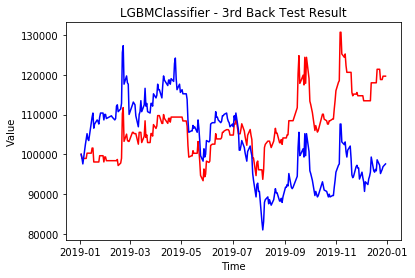

,d2,d1,hold,u1,u2,cash,stock,adjusted_price,buy_sell,value,strategy_3_index
0,0.0067442,0.0754935,0.00103773,0.782255,0.135507,0,69.2042,1445,,100000,0.580161
1,0.754125,0.0232291,0.00307464,0.171078,0.0515676,98961.9,0,1430,sell,98961.9,0.580161
2,0.0856032,0.325456,0.0151791,0.0704854,0.518455,98961.9,0,1410,sell,98961.9,0.580161
3,0.0219302,0.348322,0.00267181,0.332205,0.297542,98961.9,0,1480,sell,98961.9,0.580161
4,0.00867806,0.112477,0.000772333,0.133751,0.745094,0,65.9746,1500,buy,98961.9,0.580161
...,...,...,...,...,...,...,...,...,...,...,...
241,0.0281575,0.10682,0.195472,0.67655,0.188473,0,86.4047,1405,buy,121399,0.580161
242,0.172914,0.235917,0.031558,0.582145,0.00902323,118806,0,1375,sell,118806,0.580161
243,0.0924943,0.0270513,0.175536,0.870808,0.00964672,0,85.4723,1390,buy,118806,0.580161
244,0.0872791,0.73636,0.164505,0.122404,0.0539565,119661,0,1400,sell,119661,0.580161


In [52]:
model_name = 'LGBMClassifier'
model = model_lgbm
print('-'*100)
# score = model.score(test_X.values,test_y)
score = model.score(test_X.drop('Date', axis=1).values,test_y)
print('{} Score : {}'.format(type(model).__name__,score))
print('-'*100)
pred = get_pred_from_model(model)

mean_w = test.describe().loc['mean'].iloc[0:5]
mean_w
inv_w = 1/mean_w
weight = 10*inv_w/inv_w.drop('hold').sum()

# for func in [backtest1,backtest2,backtest3]:
#     func(model,pred,weight)
for func in [backtest3]:
    func(model,pred,weight)

In [53]:
inv_w

d2       9.346491
d1       7.173461
hold    37.598599
u1       2.291018
u2       3.442087
Name: mean, dtype: float64

In [54]:
result1 = backtest1(model_lgbm, pred, weight)
result2 = backtest2(model_lgbm, pred, weight)
result3 = backtest3(model_lgbm, pred, weight)

NameError: name 'backtest1' is not defined

In [55]:
result3['tomorrow_pct']=result3['adjusted_price'].pct_change().shift(periods=-1)*100

NameError: name 'result3' is not defined

In [56]:
pd.options.display.max_rows=300

In [57]:
result3[['d2','d1','hold','u1','u2','buy_sell','tomorrow_pct','cash','stock','adjusted_price','value']]

NameError: name 'result3' is not defined

In [58]:
check_result = result3[['buy_sell','tomorrow_pct']][1:-1]
check_result.head()

NameError: name 'result3' is not defined

In [59]:
def convert_pct(x):
    if x > 0:
        return 'buy'
    else:
        return 'sell'

In [60]:
check_result['true'] = check_result['tomorrow_pct'].map(convert_pct)
check_result.head()

NameError: name 'check_result' is not defined

In [61]:
check_result.shape

NameError: name 'check_result' is not defined

In [62]:
len(check_result[check_result.buy_sell==check_result.true])

NameError: name 'check_result' is not defined

In [63]:
check_result[check_result.buy_sell!=check_result.true][(check_result.tomorrow_pct>5)|(check_result.tomorrow_pct<-5)]

NameError: name 'check_result' is not defined

In [64]:
check_result[check_result.buy_sell==check_result.true][(check_result.tomorrow_pct>5)|(check_result.tomorrow_pct<-5)]

NameError: name 'check_result' is not defined

In [65]:
# def grid_search_model(model, params):

#     print('-'*100)

#     model_name = type(model).__name__
#     print('Grid-Searning : {}'.format(model_name))

#     start_time = time.time()
# #     datetime.now()
#     print('Start Time : {}'.format(start_time))

#     model_grid = GridSearchCV(model,
#                               param_grid=params,
#                               cv=5,
#                               verbose=5,
#                               n_jobs=-1)

#     model_grid.fit(X_train, y_train)

# #     score = cross_validate(model_grid,
# #                            X_train,
# #                            y_train,
# #                            cv=k_fold,
# #                            n_jobs=-1,
# #                            verbose=1,
# #                            scoring='accuracy')
# #     print('Test Mean Score : {}'.format(np.round(np.mean(score['test_score'])*100),2))
# #     print('Fit Time / Each CV : {}s'.format(np.round(np.mean(score['fit_time'])),2))

#     print('Best Estimator : {}'.format(model_grid.best_estimator_))

#     print('Best Params : {}'.format(model_grid.best_params_))

#     scores_df = pd.DataFrame(model_grid.cv_results_)

#     display(scores_df.head())

#     print('[{}] Grid Search Score : {}'.format(
#         model_name, model_grid.score(X_val, y_val)))

#     end_time = time.time()-start_time
    

#     print('End Time : {}'.format(start_time))
#     print('Duration Time : {}'.format(end_time-start_time))

In [66]:
# models_dict = [
# #     (model_rf, {'n_estimators': [100, 300, 500, 700, 900],
# #                 'max_features': ['auto', 'sqrt', 'log2']
# #                 }),

# #     (model_xgb, {'max_depth': range(2, 30, 2),
# #                  'n_estimators': range(300, 500, 40),
# #                  'learning_rate': [1, 0.5, 0.1, 0.01, 0.05]
# #                  }),



# #     (model_catb, {'depth': [2, 3, 4, 5, 6, 7],
# #                   'loss_function': ['Logloss', 'CrossEntropy'],
# #                   'l2_leaf_reg':np.logspace(-20, -19, 3)
# #                   }),

#     (model_lgbm, {'num_leaves': [31, 127],
#                   'reg_alpha': [0.1, 0.5],
#                   'min_data_in_leaf': [30, 50, 100, 300, 400],
#                   'learning_rate': [1, 0.5, 0.1, 0.01, 0.05],
#                   'lambda_l1': [0, 1, 1.5],
#                   'lambda_l2': [0, 1]
#                   })
# ]

In [67]:
# for model, params in models_dict:
#     grid_search_model(model, params)